# Notebook for running multi-group sim with 8 groups for Cornell re-open

In [52]:
import sys
import os
import numpy as np
import multiprocessing
import dill
import matplotlib.pyplot as plt
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from load_params import load_params

from multi_group_simulation import MultiGroupSimulation

## Importing Params, setting up group sim

In [53]:
# ug_dorm_params = load_params('../src/simulations_v2/params/baseline_testing/virtual_instruction/ug_dorm_virtual.yaml')[1]
# ug_off_campus_params = load_params('../src/simulations_v2/params/baseline_testing/virtual_instruction/ug_off_campus_virtual.yaml')[1]
gs_research_params = load_params('../src/simulations_v2/params/baseline_testing/virtual_instruction/grad_research_virtual.yaml')[1]
# gs_other_params = load_params('../src/simulations_v2/params/baseline_testing/virtual_instruction/grad_other_virtual.yaml')[1]
faculty_staff_student_params = load_params('../src/simulations_v2/params/baseline_testing/virtual_instruction/faculty_staff_student_same_age_virtual.yaml')[1]
faculty_staff_non_student_params = load_params('../src/simulations_v2/params/baseline_testing/virtual_instruction/faculty_staff_non_student_same_age_virtual.yaml')[1]
faculty_staff_off_campus_params = load_params('../src/simulations_v2/params/baseline_testing/virtual_instruction/faculty_staff_off_campus_same_age_virtual.yaml')[1]
ithaca_community_params = load_params('../src/simulations_v2/params/baseline_testing/virtual_instruction/ithaca_community_virtual.yaml')[1]


ug_off_campus_unmonitored_params = load_params('../src/simulations_v2/params/baseline_testing/virtual_instruction/ug_off_campus_unmonitored_virtual.yaml')[1]
ug_off_campus_compliant_params = load_params('../src/simulations_v2/params/baseline_testing/virtual_instruction/ug_off_campus_compliant_virtual.yaml')[1]
gs_other_unmonitored_params = load_params('../src/simulations_v2/params/baseline_testing/virtual_instruction/grad_other_unmonitored_virtual.yaml')[1]
gs_other_compliant_params = load_params('../src/simulations_v2/params/baseline_testing/virtual_instruction/grad_other_compliant_virtual.yaml')[1]





In [54]:
# interaction_matrix = np.array([[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
#                                [0.00,8,0.1,0.1,0.05,0.05,0.05,1],
#                                [0.00,0.22,4,0.1,1.2,0.05,0.2,1.8],
#                                [0.00,0.24,0.11,7,0.05,0.05,0.05,1.8],
#                                [0.00,0.05,0.53,0.02,1,0.15,0.3,1.56],
#                                [0.00,0.09,0.04,0.04,0.28,1.8,0.2,1.56],
#                                [0.00,0.04,0.07,0.02,0.23,0.08,1.8,1.56],
#                                [0.000,0.056,0.046,0.042,0.091,0.048,0.12,3.5]])

# UG 11.41, GS 9
interaction_matrix = np.array([[9.128, 2.282, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 1],
                               [9.128, 2.282, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 1],
                               [0.17, 0.0435, 4, 0.1, 0.1, 1.2, 0.05, 0.2, 1.8],
                               [0.19, 0.05, 0.11, 7.2, 1.8, 0.05, 0.05, 0.05, 1],
                               [0.19, 0.05, 0.11, 7.2, 1.8, 0.05, 0.05, 0.05, 1],
                               [0.04, 0.01, 0.53, 0.02, 0.00, 1, 0.15, 0.3, 1.56],
                               [0.07, 0.02, 0.04, 0.03, 0.01, 0.28, 1.8, 0.2, 1.56],
                               [0.03, 0.01, 0.07, 0.01, 0.00, 0.23, 0.08, 1.8, 1.56],
                               [0.045, 0.011, 0.046, 0.034, 0.008, 0.091, 0.048, 0.12, 3.5]
                              ])
# UG 11.0814, GS 8.7408
# interaction_matrix = np.array([[8.8651, 2.2163, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 1],
#                                [8.8651, 2.2163, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 1],
#                                [0.17, 0.0435, 4, 0.1, 0.1, 1.2, 0.05, 0.2, 1.8],
#                                [0.19, 0.05, 0.11, 6.9926, 1.7482, 0.05, 0.05, 0.05, 1],
#                                [0.19, 0.05, 0.11, 6.9926, 1.7482, 0.05, 0.05, 0.05, 1],
#                                [0.04, 0.01, 0.53, 0.02, 0.00, 1, 0.15, 0.3, 1.56],
#                                [0.07, 0.02, 0.04, 0.03, 0.01, 0.28, 1.8, 0.2, 1.56],
#                                [0.03, 0.01, 0.07, 0.01, 0.00, 0.23, 0.08, 1.8, 1.56],
#                                [0.045, 0.011, 0.046, 0.034, 0.008, 0.091, 0.048, 0.12, 3.5]
#                               ])

# group_names = ['UG (campus)', 'UG (off campus)', 'GS (research)', 'GS (other)', 'Faculty/Staff (student facing)', 'Faculty/Staff (non student facing)', 'Faculty/Staff (off campus)', 'Ithaca Community']
group_names = ['UGlow unmonitored', 'UGlow compiant' 'GSresearch', 'GSclass unmonitored', 'GSclass compliant', 'FSstudent', 'FSnostudent', 'FSoff', 'Ithaca']



In [55]:
def get_cum_hosp(df):
    return df[['severity_3', 'severity_2']].iloc[df.shape[0] - 1].sum()

def get_cum_outside_infections(df):
    return df['cumulative_outside_infections'].iloc[df.shape[0] - 1].sum()

def get_cum_infections(df):
    return df[['cumulative_mild', 'cumulative_severe']].iloc[df.shape[0] - 1].sum()

def total_infections(list_sim_dfs):
    total = 0
    for sim_df in list_sim_dfs:
        total += get_cum_infections(sim_df)
    return total

def total_hosp(list_sim_dfs):
    total = 0
    for sim_df in list_sim_dfs:
        total += get_cum_hosp(sim_df)
    return total

def cornell_infections(list_sim_dfs):
    total = 0
    for sim_df in list_sim_dfs[:-1]:
        total += get_cum_infections(sim_df)
    return total

def cornell_hosp(list_sim_dfs):
    total = 0
    for sim_df in list_sim_dfs[:-1]:
        total += get_cum_hosp(sim_df)
    return total

In [56]:
def run_multigroup_sim(sim, T):
    sim.run_new_trajectory(112)
    inf_list = list()
    hosp_list = list()
    for group in sim.sims:
        df = group.sim_df
        inf_list.append(get_cum_infections(df))
        hosp_list.append(get_cum_hosp(df))
    return inf_list, hosp_list

def run_multiple_trajectories(sim, T, n):
    inf_matrix = list()
    hosp_matrix = list()
    for _ in range(n):
        result = run_multigroup_sim(sim, T)
        inf_matrix.append(result[0])
        hosp_matrix.append(result[1])
    return inf_matrix, hosp_matrix

In [57]:
def evaluate_testing_policy(params_list, interaction_matrix, group_names, test_frac, T, n):
    assert len(params_list) == len(test_frac)
    
    group_size = list()
    tests_per_day = 0
    
    # set group based contacts per day, test frequency
    for index, params in enumerate(params_list):
        params['expected_contacts_per_day'] = interaction_matrix[index, index]
        params['test_population_fraction'] = test_frac[index]
        group_size.append(params['population_size'])
        tests_per_day += group_size[-1] * test_frac[index]
    
    assert len(group_size) == len(test_frac)
    
    sim = MultiGroupSimulation(params_list, interaction_matrix, group_names)
    inf_matrix, hosp_matrix = run_multiple_trajectories(sim, T, n)
    return tests_per_day, inf_matrix, hosp_matrix

In [58]:
def generate_plotting_matrix(results_list):
    daily_tests = list()
    inf = list()
    inf_low = list()
    inf_high = list()
    hosp = list()
    hosp_low = list()
    hosp_high = list()
    cornell_inf = list()
    cornell_inf_low = list()
    cornell_inf_high = list()
    cornell_hosp = list()
    cornell_hosp_low = list()
    cornell_hosp_high = list()
    ithaca_inf = list()
    
    ithaca_inf_low = list()
    ithaca_inf_high = list()
    ithaca_hosp = list()
    ithaca_hosp_low = list()
    ithaca_hosp_high = list()


    policy_ug_off_campus_unmonitored = list()
    policy_ug_off_campus_compliant = list()
    policy_grad_research = list()
    policy_grad_other_unmonitored = list()
    policy_grad_other_compliant = list()
    policy_staff_student = list()
    policy_staff_non_student = list()
    policy_staff_off_campus = list()
    
    policies = list()
    
    for policy_dict in results_list:
        daily_tests.append(policy_dict['tests_per_day'])
        inf.append(np.quantile(np.sum(policy_dict['inf_matrix'], axis=1), 0.5, axis=0))
        inf_low.append(np.quantile(np.sum(policy_dict['inf_matrix'], axis=1), 0.1, axis=0))
        inf_high.append(np.quantile(np.sum(policy_dict['inf_matrix'], axis=1), 0.9, axis=0))
        hosp.append(np.quantile(np.sum(policy_dict['hosp_matrix'], axis=1), 0.5, axis=0))
        hosp_low.append(np.quantile(np.sum(policy_dict['hosp_matrix'], axis=1), 0.1, axis=0))
        hosp_high.append(np.quantile(np.sum(policy_dict['hosp_matrix'], axis=1), 0.9, axis=0))
        
       

        cornell_inf.append(np.quantile(np.sum(np.array(policy_dict['inf_matrix'])[:,:-1], axis=1), 0.5, axis=0))
        cornell_inf_low.append(np.quantile(np.sum(np.array(policy_dict['inf_matrix'])[:,:-1], axis=1), 0.1, axis=0))
        cornell_inf_high.append(np.quantile(np.sum(np.array(policy_dict['inf_matrix'])[:,:-1], axis=1), 0.9, axis=0))
        cornell_hosp.append(np.quantile(np.sum(np.array(policy_dict['hosp_matrix'])[:,:-1], axis=1), 0.5, axis=0))
        cornell_hosp_low.append(np.quantile(np.sum(np.array(policy_dict['hosp_matrix'])[:,:-1], axis=1), 0.1, axis=0))
        cornell_hosp_high.append(np.quantile(np.sum(np.array(policy_dict['hosp_matrix'])[:,:-1], axis=1), 0.9, axis=0))
        
        
        
        ithaca_inf.append(np.quantile(np.sum(np.array(policy_dict['inf_matrix'])[:,-1][:,None], axis=1), 0.5, axis=0))
        ithaca_inf_low.append(np.quantile(np.sum(np.array(policy_dict['inf_matrix'])[:,-1][:,None], axis=1), 0.1, axis=0))
        ithaca_inf_high.append(np.quantile(np.sum(np.array(policy_dict['inf_matrix'])[:,-1][:,None], axis=1), 0.9, axis=0))
        ithaca_hosp.append(np.quantile(np.sum(np.array(policy_dict['hosp_matrix'])[:,-1][:,None], axis=1), 0.5, axis=0))
        ithaca_hosp_low.append(np.quantile(np.sum(np.array(policy_dict['hosp_matrix'])[:,-1][:,None], axis=1), 0.1, axis=0))
        ithaca_hosp_high.append(np.quantile(np.sum(np.array(policy_dict['hosp_matrix'])[:,-1][:,None], axis=1), 0.9, axis=0))
        
        policy_ug_off_campus_unmonitored.append(int(policy_dict['test_policy'][0]*7))
        policy_ug_off_campus_compliant.append(int(policy_dict['test_policy'][1]*7))
        policy_grad_research.append(int(policy_dict['test_policy'][2]*7))
        policy_grad_other_unmonitored.append(int(policy_dict['test_policy'][3]*7))
        policy_grad_other_compliant.append(int(policy_dict['test_policy'][4]*7))
        policy_staff_student.append(int(policy_dict['test_policy'][5]*7))
        policy_staff_non_student.append(int(policy_dict['test_policy'][6]*7))
        policy_staff_off_campus.append(policy_dict['test_policy'][7]*7)
              
        
        test_policy_string = '['
        for frequency in policy_dict['test_policy'][:-2]:
            test_policy_string += str(int(frequency * 7)) + ','
        test_policy_string += str(np.round(policy[-2] * 7, 2))
        test_policy_string += ']'
        policies.append(test_policy_string)
        
    plotting_data = pd.DataFrame({'daily_tests': daily_tests, 'inf': inf, 'inf_low': inf_low, 'inf_high': inf_high, 'hosp': hosp,
                  'hosp_low': hosp_low, 'hosp_high': hosp_high, 'cornell_inf': cornell_inf, 'cornell_inf_low': cornell_inf_low,
                  'cornell_inf_high': cornell_inf_high, 'cornell_hosp': cornell_hosp, 'cornell_hosp_low': cornell_hosp_low,
                  'cornell_hosp_high': cornell_hosp_high,'ithaca_inf': ithaca_inf, 'ithaca_inf_low': ithaca_inf_low,
                  'ithaca_inf_high': ithaca_inf_high, 'ithaca_hosp': ithaca_hosp, 'ithaca_hosp_low': ithaca_hosp_low,
                  'ithaca_hosp_high': ithaca_hosp_high,
                                  
                  'test_policy_ug_off_campus_unmonitored': policy_ug_off_campus_unmonitored,
                  'test_policy_ug_off_campus_compliant': policy_ug_off_campus_compliant,               
                  'test_policy_grad_research': policy_grad_research, 
                  'test_policy_grad_other_unmonitored': policy_grad_other_unmonitored,
                  'test_policy_grad_other_compliant': policy_grad_other_compliant,               
                  'test_policy_staff_student': policy_staff_student,
                  'test_policy_staff_non_student': policy_staff_non_student,
                  'test_policy_staff_off_campus': policy_staff_off_campus,
                  'test_policy': policies})

    
    plotting_data['inf_yerr_low'] = plotting_data['inf'] - plotting_data['inf_low']
    plotting_data['inf_yerr_high'] = plotting_data['inf_high'] - plotting_data['inf']
    plotting_data['hosp_yerr_low'] = plotting_data['hosp'] - plotting_data['hosp_low']
    plotting_data['hosp_yerr_high'] = plotting_data['hosp_high'] - plotting_data['hosp']
    
    plotting_data['cornell_inf_yerr_low'] = plotting_data['cornell_inf'] - plotting_data['cornell_inf_low']
    plotting_data['cornell_inf_yerr_high'] = plotting_data['cornell_inf_high'] - plotting_data['cornell_inf']
    plotting_data['cornell_hosp_yerr_low'] = plotting_data['cornell_hosp'] - plotting_data['cornell_hosp_low']
    plotting_data['cornell_hosp_yerr_high'] = plotting_data['cornell_hosp_high'] - plotting_data['cornell_hosp']
    
    plotting_data['ithaca_inf_yerr_low'] = plotting_data['ithaca_inf'] - plotting_data['ithaca_inf_low']
    plotting_data['ithaca_inf_yerr_high'] = plotting_data['ithaca_inf_high'] - plotting_data['ithaca_inf']
    plotting_data['ithaca_hosp_yerr_low'] = plotting_data['ithaca_hosp'] - plotting_data['ithaca_hosp_low']
    plotting_data['ithaca_hosp_yerr_high'] = plotting_data['ithaca_hosp_high'] - plotting_data['ithaca_hosp']
    
    return plotting_data

In [59]:
def plot_policy_performance(plotting_data):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    plt.errorbar(x='daily_tests', y='inf', yerr = [plotting_data.head(9)['inf_yerr_low'],plotting_data.head(9)['inf_yerr_high']], fmt='o', data=plotting_data.head(9), label='baseline')
    plt.title('Infections vs. Daily tests for various policies')
    plt.ylabel('Infections')
    plt.xlabel('Daily Tests')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10,6))
    plt.errorbar(x='daily_tests', y='hosp', yerr = [plotting_data.head(9)['hosp_yerr_low'],plotting_data.head(9)['hosp_yerr_high']], fmt='o', data=plotting_data.head(9), label='baseline')
    plt.title('Hospitalizations vs. Daily tests for various policies')
    plt.ylabel('Hospitalizations')
    plt.xlabel('Daily Tests')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10,6))
    plt.errorbar(x='daily_tests', y='cornell_inf', yerr = [plotting_data.head(9)['cornell_inf_yerr_low'],plotting_data.head(9)['cornell_inf_yerr_high']], fmt='o', data=plotting_data.head(9), label='baseline')
    plt.title('Cornell Infections vs. Daily tests for various policies')
    plt.ylabel('Cornell Infections')
    plt.xlabel('Daily Tests')
    plt.legend()
    plt.show()


    plt.figure(figsize=(10,6))
    plt.errorbar(x='daily_tests', y='cornell_hosp', yerr = [plotting_data.head(9)['cornell_hosp_yerr_low'],plotting_data.head(9)['cornell_hosp_yerr_high']], fmt='o', data=plotting_data.head(9), label='baseline')
    plt.title('Cornell Hospitalizations vs. Daily tests for various policies')
    plt.ylabel('Cornell Hospitalizations')
    plt.xlabel('Daily Tests')
    plt.legend()
    plt.show()
    
    
    plt.figure(figsize=(10,6))
    plt.errorbar(x='daily_tests', y='ithaca_inf', yerr = [plotting_data.head(9)['ithaca_inf_yerr_low'],plotting_data.head(9)['ithaca_inf_yerr_high']], fmt='o', data=plotting_data.head(9), label='baseline')
    plt.title('Great Ithaca Infections vs. Daily tests for various policies')
    plt.ylabel('Great Ithaca Infections')
    plt.xlabel('Daily Tests')
    plt.legend()
    plt.show()


    plt.figure(figsize=(10,6))
    plt.errorbar(x='daily_tests', y='ithaca_hosp', yerr = [plotting_data.head(9)['ithaca_hosp_yerr_low'],plotting_data.head(9)['ithaca_hosp_yerr_high']], fmt='o', data=plotting_data.head(9), label='baseline')
    plt.title('Great Ithaca Hospitalizations vs. Daily tests for various policies')
    plt.ylabel('Great Ithaca Hospitalizations')
    plt.xlabel('Daily Tests')
    plt.legend()
    plt.show()

## Testing evaluate_testing_policy 

In [60]:
# testing_results = list()
# for policy in [[0, 2/7,1/7,0,2/7, 1/7,1/7,1/30, 0]]:
#     print('Evaluating this policy: ', policy)
#     params_list = [ug_off_campus_unmonitored_params.copy(), ug_off_campus_compliant_params.copy(), gs_research_params.copy(), gs_other_unmonitored_params.copy(), gs_other_compliant_params.copy(), faculty_staff_student_params.copy(), faculty_staff_non_student_params.copy(), faculty_staff_off_campus_params.copy(), ithaca_community_params.copy()]
#     tests_per_day, inf_matrix, hosp_matrix = evaluate_testing_policy(params_list, interaction_matrix, group_names, policy, 112, 5)    
#     testing_results.append({'test_policy': policy, 'tests_per_day': tests_per_day, 'inf_matrix': inf_matrix, 'hosp_matrix': hosp_matrix})

In [61]:
# plotting_data = generate_plotting_matrix(testing_results)
# plotting_data

In [62]:
# plot_policy_performance(plotting_data)

## Virtual (change contact rate for unmonitored * 0.9712)

In [338]:
limited_policies = [[0, 2/7,1/7,0,2/7, 2/7,1/7,1/30, 0]]

interaction_matrix_v3 = np.array([[8.8651, 2.2163, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 1],
                                [8.8651, 2.2163, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 1],
                                [0.17, 0.0435, 4, 0.1, 0.1, 1.2, 0.05, 0.2, 1.8],
                                [0.19, 0.05, 0.11, 6.9926, 1.7482, 0.05, 0.05, 0.05, 1],
                                [0.19, 0.05, 0.11, 6.9926, 1.7482, 0.05, 0.05, 0.05, 1],
                                [0.04, 0.01, 0.53, 0.02, 0.00, 1, 0.15, 0.3, 1.56],
                                [0.07, 0.02, 0.04, 0.03, 0.01, 0.28, 1.8, 0.2, 1.56],
                                [0.03, 0.01, 0.07, 0.01, 0.00, 0.23, 0.08, 1.8, 1.56],
                                [0.045, 0.011, 0.046, 0.034, 0.008, 0.091, 0.048, 0.12, 3.5]
                               ])

virtual_2 = list()

for policy in limited_policies:
    print('Evaluating this policy: ', policy)
#     params_list = [ug_dorm_params.copy(), ug_off_campus_params.copy(), gs_research_params.copy(), gs_other_params.copy(), faculty_staff_student_params.copy(), faculty_staff_non_student_params.copy(), faculty_staff_off_campus_params.copy(), ithaca_community_params.copy()]
    params_list = [ug_off_campus_unmonitored_params.copy(), ug_off_campus_compliant_params.copy(), gs_research_params.copy(), gs_other_unmonitored_params.copy(), gs_other_compliant_params.copy(), faculty_staff_student_params.copy(), faculty_staff_non_student_params.copy(), faculty_staff_off_campus_params.copy(), ithaca_community_params.copy()]
    tests_per_day, inf_matrix, hosp_matrix = evaluate_testing_policy(params_list, interaction_matrix_v3, group_names, policy, 112, 50)
    virtual_2.append({'test_policy': policy, 'tests_per_day': tests_per_day, 'inf_matrix': inf_matrix, 'hosp_matrix': hosp_matrix})

Evaluating this policy:  [0, 0.2857142857142857, 0.14285714285714285, 0, 0.2857142857142857, 0.2857142857142857, 0.14285714285714285, 0.03333333333333333, 0]


In [339]:
plotting_data_2 = generate_plotting_matrix(virtual_2)

In [234]:
# plot_policy_performance(plotting_data_2)

In [297]:
# virtual_2

## Virtual, less compliant (change contact rate for unmonitored * 1.0629)

In [340]:
limited_policies = [[0, 2/7,1/7,0,2/7, 2/7,1/7,1/30, 0]]

interaction_matrix_v4 = np.array([[9.7022, 2.4255, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 1],
                                [9.7022, 2.4255, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 1],
                                [0.17, 0.0435, 4, 0.1, 0.1, 1.2, 0.05, 0.2, 1.8],
                                [0.19, 0.05, 0.11, 7.6529, 1.9132, 0.05, 0.05, 0.05, 1],
                                [0.19, 0.05, 0.11, 7.6529, 1.9132, 0.05, 0.05, 0.05, 1],
                                [0.04, 0.01, 0.53, 0.02, 0.00, 1, 0.15, 0.3, 1.56],
                                [0.07, 0.02, 0.04, 0.03, 0.01, 0.28, 1.8, 0.2, 1.56],
                                [0.03, 0.01, 0.07, 0.01, 0.00, 0.23, 0.08, 1.8, 1.56],
                                [0.045, 0.011, 0.046, 0.034, 0.008, 0.091, 0.048, 0.12, 3.5]
                               ])

virtual_3 = list()

for policy in limited_policies:
    print('Evaluating this policy: ', policy)
#     params_list = [ug_dorm_params.copy(), ug_off_campus_params.copy(), gs_research_params.copy(), gs_other_params.copy(), faculty_staff_student_params.copy(), faculty_staff_non_student_params.copy(), faculty_staff_off_campus_params.copy(), ithaca_community_params.copy()]
    params_list = [ug_off_campus_unmonitored_params.copy(), ug_off_campus_compliant_params.copy(), gs_research_params.copy(), gs_other_unmonitored_params.copy(), gs_other_compliant_params.copy(), faculty_staff_student_params.copy(), faculty_staff_non_student_params.copy(), faculty_staff_off_campus_params.copy(), ithaca_community_params.copy()]
    tests_per_day, inf_matrix, hosp_matrix = evaluate_testing_policy(params_list, interaction_matrix_v4, group_names, policy, 112, 50)
    virtual_3.append({'test_policy': policy, 'tests_per_day': tests_per_day, 'inf_matrix': inf_matrix, 'hosp_matrix': hosp_matrix})

Evaluating this policy:  [0, 0.2857142857142857, 0.14285714285714285, 0, 0.2857142857142857, 0.2857142857142857, 0.14285714285714285, 0.03333333333333333, 0]


In [341]:
plotting_data_3 = generate_plotting_matrix(virtual_3)

In [233]:
# plot_policy_performance(plotting_data_3)

In [298]:
# virtual_3

## Residential

In [242]:
ug_dorm_params = load_params('../src/simulations_v2/params/baseline_testing/august_5/ug_dorm.yaml')[1]
ug_off_campus_params = load_params('../src/simulations_v2/params/baseline_testing/august_5/ug_off_campus.yaml')[1]
gs_research_params = load_params('../src/simulations_v2/params/baseline_testing/august_5/grad_research.yaml')[1]
gs_other_params = load_params('../src/simulations_v2/params/baseline_testing/august_5/grad_other.yaml')[1]
faculty_staff_student_params = load_params('../src/simulations_v2/params/baseline_testing/august_5/faculty_staff_student_same_age.yaml')[1]
faculty_staff_non_student_params = load_params('../src/simulations_v2/params/baseline_testing/august_5/faculty_staff_non_student_same_age.yaml')[1]
faculty_staff_off_campus_params = load_params('../src/simulations_v2/params/baseline_testing/august_5/faculty_staff_off_campus_same_age.yaml')[1]
ithaca_community_params = load_params('../src/simulations_v2/params/baseline_testing/august_5/ithaca_community.yaml')[1]

In [243]:
limited_policies = [[2/7,2/7,1/7,2/7,2/7,1/7,1/30,0]]

interaction_matrix_v5 = np.array([[12.5,4,0.1,0.1,1,0.05,0.05,0.1],
                               [3.41,8,0.1,0.1,1,0.05,0.05,0.2],
                               [0.19,0.22,4,0.1,1.2,0.05,0.2,1.8],
                               [0.14,0.17,0.07,9,1,0.05,0.05,0.2],
                               [1.92,2.26,1.22,1.37,1,0.15,0.3,1.56],
                               [0.18,0.21,0.1,0.13,0.28,1.8,0.2,1.56],
                               [0.07,0.09,0.15,0.05,0.23,0.08,1.8,1.56],
                               [0.011,0.026,0.106,0.016,0.091,0.048,0.12,3.5]])

group_names = ['UG (campus)', 'UG (off campus)', 'GS (research)', 'GS (other)', 'Faculty/Staff (student facing)', 'Faculty/Staff (non student facing)', 'Faculty/Staff (off campus)', 'Ithaca Community']

In [244]:
inperson_1 = list()
for policy in limited_policies:
    print('Evaluating this policy: ', policy)
    params_list = [ug_dorm_params.copy(), ug_off_campus_params.copy(), gs_research_params.copy(), gs_other_params.copy(), faculty_staff_student_params.copy(), faculty_staff_non_student_params.copy(), faculty_staff_off_campus_params.copy(), ithaca_community_params.copy()]
    tests_per_day, inf_matrix, hosp_matrix = evaluate_testing_policy(params_list, interaction_matrix_v5, group_names, policy, 112, 50)
    inperson_1.append({'test_policy': policy, 'tests_per_day': tests_per_day, 'inf_matrix': inf_matrix, 'hosp_matrix': hosp_matrix})

Evaluating this policy:  [0.2857142857142857, 0.2857142857142857, 0.14285714285714285, 0.2857142857142857, 0.14285714285714285, 0.14285714285714285, 0.03333333333333333, 0]


In [245]:
plotting_data_4 = generate_plotting_matrix(inperson_1)

In [232]:
# plot_policy_performance(plotting_data_4)

In [299]:
# inperson_1

## Residential, less compliant (residential * 1.2143)

In [246]:
interaction_matrix_v6 = np.array([[15.1788,4.8572,0.1,0.1,1,0.05,0.05,0.1],
                               [4.14,9.7144,0.1,0.1,1,0.05,0.05,0.2],
                               [0.19,0.22,4,0.1,1.2,0.05,0.2,1.8],
                               [0.14,0.17,0.07,10.9287,1,0.05,0.05,0.2],
                               [1.92,2.26,1.22,1.37,1,0.15,0.3,1.56],
                               [0.18,0.21,0.1,0.13,0.28,1.8,0.2,1.56],
                               [0.07,0.09,0.15,0.05,0.23,0.08,1.8,1.56],
                               [0.011,0.026,0.106,0.016,0.091,0.048,0.12,3.5]])

group_names = ['UG (campus)', 'UG (off campus)', 'GS (research)', 'GS (other)', 'Faculty/Staff (student facing)', 'Faculty/Staff (non student facing)', 'Faculty/Staff (off campus)', 'Ithaca Community']

In [247]:
inperson_2 = list()
for policy in [[2/7,2/7,1/7,2/7,2/7,1/7,1/30,0]]:
    print('Evaluating this policy: ', policy)
    params_list = [ug_dorm_params.copy(), ug_off_campus_params.copy(), gs_research_params.copy(), gs_other_params.copy(), faculty_staff_student_params.copy(), faculty_staff_non_student_params.copy(), faculty_staff_off_campus_params.copy(), ithaca_community_params.copy()]
    tests_per_day, inf_matrix, hosp_matrix = evaluate_testing_policy(params_list, interaction_matrix_v6, group_names, policy, 112, 50)
    inperson_2.append({'test_policy': policy, 'tests_per_day': tests_per_day, 'inf_matrix': inf_matrix, 'hosp_matrix': hosp_matrix})

Evaluating this policy:  [0.2857142857142857, 0.2857142857142857, 0.14285714285714285, 0.2857142857142857, 0.14285714285714285, 0.14285714285714285, 0.03333333333333333, 0]


In [248]:
plotting_data_5 = generate_plotting_matrix(inperson_2)

In [231]:
# plot_policy_performance(plotting_data_5)

In [293]:
# inperson_2[0]['inf_matrix']

In [294]:
# ug_dorm_inf=np.array(inperson_2[0]['inf_matrix'])[:,0]
# ug_off_campus_inf = np.array(inperson_2[0]['inf_matrix'])[:,1]

In [295]:
# ug_dorm_inf

In [296]:
# ug_off_campus_inf

In [358]:
plotting_data_2['name'] = 'Virtual'
plotting_data_3['name'] = 'Virtual, less compliant'
plotting_data_4['name'] = 'Residential'
plotting_data_5['name'] = 'Residential, less compliant'

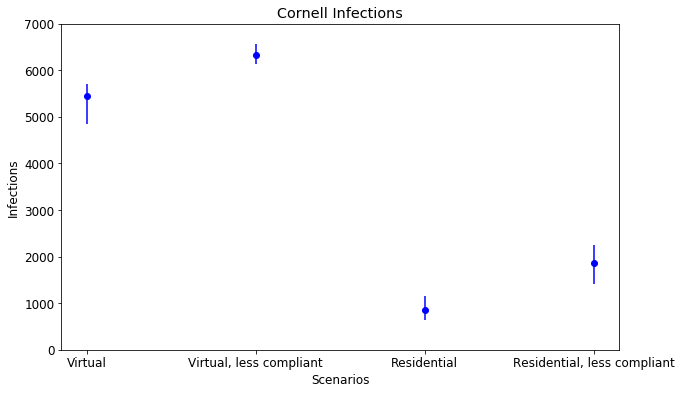

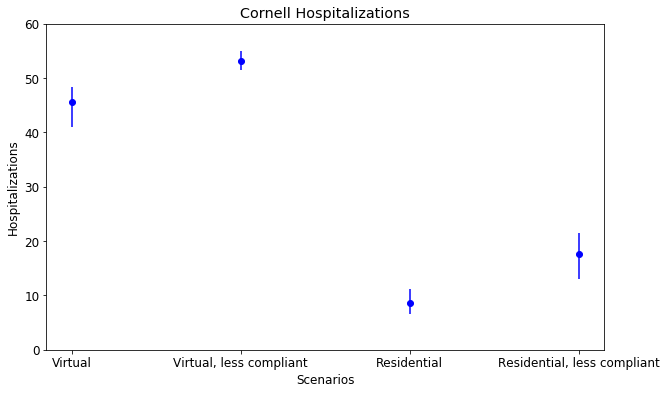

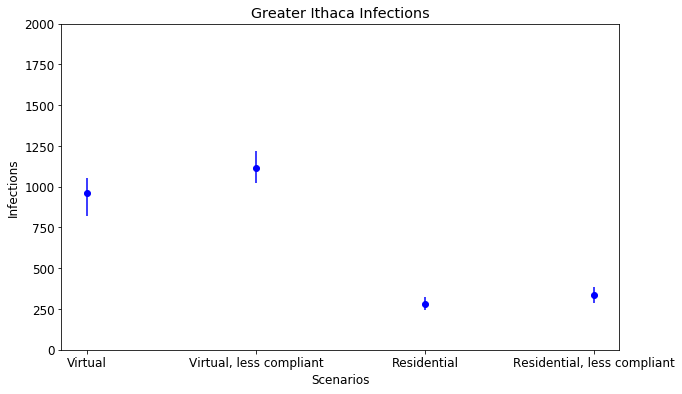

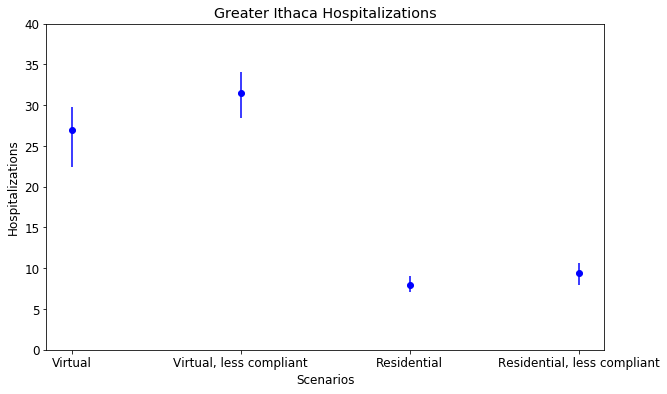

In [362]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

plt.errorbar(x='name', y='cornell_inf', yerr = [plotting_data_2['cornell_inf_yerr_low'],plotting_data_2['cornell_inf_yerr_high']], fmt='o', color='b',data=plotting_data_2)
plt.errorbar(x='name', y='cornell_inf', yerr = [plotting_data_3['cornell_inf_yerr_low'],plotting_data_3['cornell_inf_yerr_high']], fmt='o', color='b',data=plotting_data_3)
plt.errorbar(x='name', y='cornell_inf', yerr = [plotting_data_4['cornell_inf_yerr_low'],plotting_data_4['cornell_inf_yerr_high']], fmt='o', color='b',data=plotting_data_4)
plt.errorbar(x='name', y='cornell_inf', yerr = [plotting_data_5['cornell_inf_yerr_low'],plotting_data_5['cornell_inf_yerr_high']], fmt='o', color='b',data=plotting_data_5)

plt.title('Cornell Infections')
plt.ylabel('Infections')
plt.xlabel('Scenarios')
plt.ylim(0, 7000)
plt.show()


fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

plt.errorbar(x='name', y='cornell_hosp', yerr = [plotting_data_2['cornell_hosp_yerr_low'],plotting_data_2['cornell_hosp_yerr_high']], fmt='o', color='b', data=plotting_data_2)
plt.errorbar(x='name', y='cornell_hosp', yerr = [plotting_data_3['cornell_hosp_yerr_low'],plotting_data_3['cornell_hosp_yerr_high']], fmt='o', color='b',data=plotting_data_3)
plt.errorbar(x='name', y='cornell_hosp', yerr = [plotting_data_4['cornell_hosp_yerr_low'],plotting_data_4['cornell_hosp_yerr_high']], fmt='o', color='b',data=plotting_data_4)
plt.errorbar(x='name', y='cornell_hosp', yerr = [plotting_data_5['cornell_hosp_yerr_low'],plotting_data_5['cornell_hosp_yerr_high']], fmt='o', color='b',data=plotting_data_5)

plt.title('Cornell Hospitalizations')
plt.ylabel('Hospitalizations')
plt.xlabel('Scenarios')
plt.ylim(0, 60)
plt.show()



fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

plt.errorbar(x='name', y='ithaca_inf', yerr = [plotting_data_2['ithaca_inf_yerr_low'],plotting_data_2['ithaca_inf_yerr_high']], fmt='o', color='b',data=plotting_data_2)
plt.errorbar(x='name', y='ithaca_inf', yerr = [plotting_data_3['ithaca_inf_yerr_low'],plotting_data_3['ithaca_inf_yerr_high']], fmt='o', color='b',data=plotting_data_3)
plt.errorbar(x='name', y='ithaca_inf', yerr = [plotting_data_4['ithaca_inf_yerr_low'],plotting_data_4['ithaca_inf_yerr_high']], fmt='o', color='b',data=plotting_data_4)
plt.errorbar(x='name', y='ithaca_inf', yerr = [plotting_data_5['ithaca_inf_yerr_low'],plotting_data_5['ithaca_inf_yerr_high']], fmt='o', color='b',data=plotting_data_5)

plt.title('Greater Ithaca Infections')
plt.ylabel('Infections')
plt.xlabel('Scenarios')
plt.ylim(0, 2000)
plt.show()


fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

plt.errorbar(x='name', y='ithaca_hosp', yerr = [plotting_data_2['ithaca_hosp_yerr_low'],plotting_data_2['ithaca_hosp_yerr_high']], fmt='o', color='b',data=plotting_data_2)
plt.errorbar(x='name', y='ithaca_hosp', yerr = [plotting_data_3['ithaca_hosp_yerr_low'],plotting_data_3['ithaca_hosp_yerr_high']], fmt='o', color='b',data=plotting_data_3)
plt.errorbar(x='name', y='ithaca_hosp', yerr = [plotting_data_4['ithaca_hosp_yerr_low'],plotting_data_4['ithaca_hosp_yerr_high']], fmt='o', color='b',data=plotting_data_4)
plt.errorbar(x='name', y='ithaca_hosp', yerr = [plotting_data_5['ithaca_hosp_yerr_low'],plotting_data_5['ithaca_hosp_yerr_high']], fmt='o', color='b',data=plotting_data_5)

plt.title('Greater Ithaca Hospitalizations')
plt.ylabel('Hospitalizations')
plt.xlabel('Scenarios')
plt.ylim(0, 40)
plt.show()

In [249]:
import seaborn as sns

In [349]:
inperson_cornell_nom_inf = np.sum(np.array(inperson_1[0]['inf_matrix'])[:,:-1], axis=1)
inperson_cornell_less_inf = np.sum(np.array(inperson_2[0]['inf_matrix'])[:,:-1], axis=1)
inperson_cornell_nom_hosp = np.sum(np.array(inperson_1[0]['hosp_matrix'])[:,:-1], axis=1)
inperson_cornell_less_hosp = np.sum(np.array(inperson_2[0]['hosp_matrix'])[:,:-1], axis=1)
virtual_cornell_nom_inf = np.sum(np.array(virtual_2[0]['inf_matrix'])[:,:-1], axis=1)
virtual_cornell_less_inf = np.sum(np.array(virtual_3[0]['inf_matrix'])[:,:-1], axis=1)
virtual_cornell_nom_hosp = np.sum(np.array(virtual_2[0]['hosp_matrix'])[:,:-1], axis=1)
virtual_cornell_less_hosp = np.sum(np.array(virtual_3[0]['hosp_matrix'])[:,:-1], axis=1)

inperson_ithaca_nom_inf = np.array(inperson_1[0]['inf_matrix'])[:,-1]
inperson_ithaca_less_inf = np.array(inperson_2[0]['inf_matrix'])[:,-1]
inperson_ithaca_nom_hosp = np.array(inperson_1[0]['hosp_matrix'])[:,-1]
inperson_ithaca_less_hosp = np.array(inperson_2[0]['hosp_matrix'])[:,-1]
virtual_ithaca_nom_inf = np.array(virtual_2[0]['inf_matrix'])[:,-1]
virtual_ithaca_less_inf = np.array(virtual_3[0]['inf_matrix'])[:,-1]
virtual_ithaca_nom_hosp = np.array(virtual_2[0]['hosp_matrix'])[:,-1]
virtual_ithaca_less_hosp = np.array(virtual_3[0]['hosp_matrix'])[:,-1]

In [350]:
print(np.mean(inperson_cornell_nom_inf))
print(np.mean(inperson_cornell_nom_hosp))
print(np.mean(inperson_ithaca_nom_inf))
print(np.mean(inperson_ithaca_nom_hosp))

877.72
8.732945569933994
285.22
8.013338487142319


In [351]:
print(np.mean(inperson_cornell_less_inf))
print(np.mean(inperson_cornell_less_hosp))
print(np.mean(inperson_ithaca_less_inf))
print(np.mean(inperson_ithaca_less_hosp))

1856.18
17.570369647476724
333.84
9.318575337333474


In [352]:
print(np.mean(virtual_cornell_nom_inf))
print(np.mean(virtual_cornell_nom_hosp))
print(np.mean(virtual_ithaca_nom_inf))
print(np.mean(virtual_ithaca_nom_hosp))

5348.92
44.992556478039916
943.44
26.401678387241578


In [353]:
print(np.mean(virtual_cornell_less_inf))
print(np.mean(virtual_cornell_less_hosp))
print(np.mean(virtual_ithaca_less_inf))
print(np.mean(virtual_ithaca_less_hosp))

6311.74
53.18238812295574
1112.46
31.332210588838667


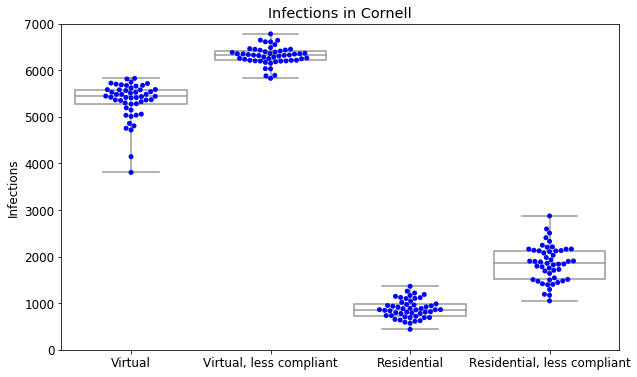

In [369]:
plt.figure(figsize=(10,6))
df1 = pd.DataFrame({'Virtual': virtual_cornell_nom_inf})
df2 = pd.DataFrame({'Virtual, less compliant': virtual_cornell_less_inf}) 
df3 = pd.DataFrame({'Residential': inperson_cornell_nom_inf})
df4 = pd.DataFrame({'Residential, less compliant': inperson_cornell_less_inf})
 
ax = sns.boxplot(data=pd.concat([df1, df2, df3, df4], ignore_index=True), whis=np.inf, color='white')
ax = sns.swarmplot(data = pd.concat([df1, df2, df3, df4], ignore_index=True), color='b')
ax.set(ylabel='Infections')
ax.set_title('Infections in Cornell')
plt.ylim(0, 7000)
plt.show()

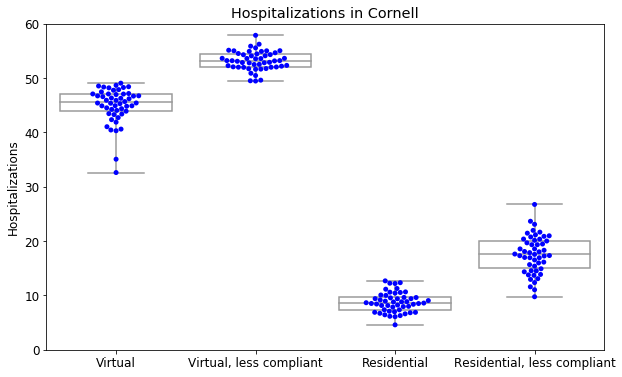

In [374]:
plt.figure(figsize=(10,6))
df1 = pd.DataFrame({'Virtual': virtual_cornell_nom_hosp})
df2 = pd.DataFrame({'Virtual, less compliant': virtual_cornell_less_hosp}) 
df3 = pd.DataFrame({'Residential': inperson_cornell_nom_hosp})
df4 = pd.DataFrame({'Residential, less compliant': inperson_cornell_less_hosp})
 
ax = sns.boxplot(data=pd.concat([df1, df2, df3, df4], ignore_index=True), whis=np.inf, color='white')
ax = sns.swarmplot(data = pd.concat([df1, df2, df3, df4], ignore_index=True), color='b')
ax.set(ylabel='Hospitalizations')
ax.set_title('Hospitalizations in Cornell')
plt.ylim(0, 60)
plt.show()

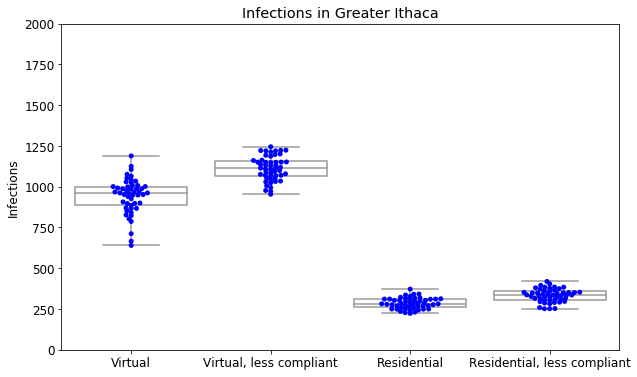

In [371]:
plt.figure(figsize=(10,6))
df1 = pd.DataFrame({'Virtual': virtual_ithaca_nom_inf})
df2 = pd.DataFrame({'Virtual, less compliant': virtual_ithaca_less_inf}) 
df3 = pd.DataFrame({'Residential': inperson_ithaca_nom_inf})
df4 = pd.DataFrame({'Residential, less compliant': inperson_ithaca_less_inf})
 
ax = sns.boxplot(data=pd.concat([df1, df2, df3, df4], ignore_index=True), whis=np.inf, color='white')
ax = sns.swarmplot(data = pd.concat([df1, df2, df3, df4], ignore_index=True), color='b')
ax.set(ylabel='Infections')
ax.set_title('Infections in Greater Ithaca')
plt.ylim(0, 2000)
plt.show()

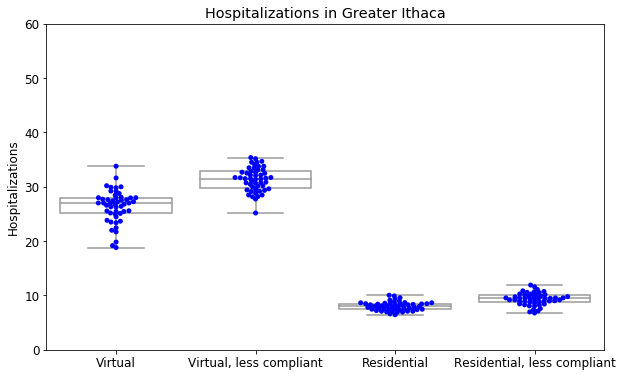

In [372]:
plt.figure(figsize=(10,6))
df1 = pd.DataFrame({'Virtual': virtual_ithaca_nom_hosp})
df2 = pd.DataFrame({'Virtual, less compliant': virtual_ithaca_less_hosp}) 
df3 = pd.DataFrame({'Residential': inperson_ithaca_nom_hosp})
df4 = pd.DataFrame({'Residential, less compliant': inperson_ithaca_less_hosp})
 
ax = sns.boxplot(data=pd.concat([df1, df2, df3, df4], ignore_index=True), whis=np.inf, color='white')
ax = sns.swarmplot(data = pd.concat([df1, df2, df3, df4], ignore_index=True), color='b')
ax.set(ylabel='Hospitalizations')
ax.set_title('Hospitalizations in Greater Ithaca')
plt.ylim(0, 60)
plt.show()

In [377]:
# points = pd.DataFrame({'In-person nominal': inperson_ithaca_nom_hosp, 'In-person less responsible': inperson_ithaca_less_hosp})
# flatui = ["#34495e", "#2ecc71"]
# ax = sns.swarmplot(data = points, palette=sns.color_palette(flatui))
# ax.set(ylabel='Hospitalizations')
# ax.set_title('Hospitalizations for In-person Instruction')



In [376]:
# points = pd.DataFrame({'Virtual nominal': virtual_ithaca_nom_inf, 'Virtual less responsible': virtual_ithaca_less_inf})
# ax = sns.swarmplot(data = points)
# sns.boxplot(data=points, whis=np.inf, color='white')
# ax.set(ylabel='Infections')
# ax.set_title('Infections for Virtual Instruction')

In [375]:
# points = pd.DataFrame({'Virtual nominal': virtual_ithaca_nom_hosp, 'Virtual less responsible': virtual_ithaca_less_hosp})
# flatui = ["#34495e", "#2ecc71"]
# ax = sns.swarmplot(data = points, palette=sns.color_palette(flatui))
# sns.boxplot(data=points, whis=np.inf, color='white')
# ax.set(ylabel='Hospitalizations')
# ax.set_title('Hospitalizations for Virtual Instruction')